<a href="https://colab.research.google.com/github/k-vinamr/data_augmentation/blob/main/Learning_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data augmentation

In [2]:
import os
import pandas as pd
import numpy as np
import PIL
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar = True)
data_dir

'./datasets/flower_photos'

In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [7]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/8622493424_877ae35ed7.jpg'),
 PosixPath('datasets/flower_photos/roses/2491600761_7e9d6776e8_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4360743371_6238b36d8c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5402157745_a384f0583d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg')]

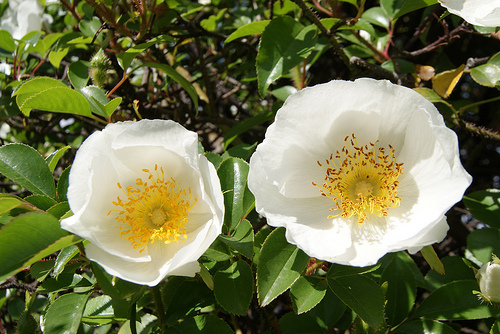

In [8]:
PIL.Image.open(str(roses[0]))

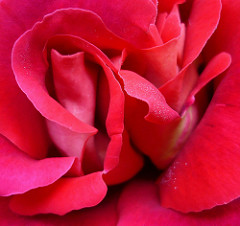

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
tulips = list(data_dir.glob('tulips/*.jpg'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/2481827798_6087d71134.jpg'),
 PosixPath('datasets/flower_photos/tulips/6948277038_89d7ff42e2_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/430785322_7ddef64c68_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/4574785121_5d8ec4626e.jpg'),
 PosixPath('datasets/flower_photos/tulips/4521037085_70d5802e1d_m.jpg')]

In [11]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*.jpg')),
    'daisy' : list(data_dir.glob('daisy/*.jpg')),
    'dandelion' : list(data_dir.glob('dandelion/*.jpg')),
    'sunflowers' : list(data_dir.glob('sunflowers/*.jpg')),
    'tulips' : list(data_dir.glob('tulips/*.jpg'))
}

In [12]:

flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,

}

In [13]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(334, 500, 3)

In [14]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)

In [18]:
len(X_train)

2752

In [19]:
len(X_test)

918

In [20]:
len(y_train)

2752

In [21]:
len(y_test)

918

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 78s 877ms/step - loss: 1.3524 - accuracy: 0.4241
Epoch 2/10
86/86 [==============================] - 79s 925ms/step - loss: 0.9969 - accuracy: 0.6228
Epoch 3/10
86/86 [==============================] - 74s 864ms/step - loss: 0.8116 - accuracy: 0.6926
Epoch 4/10
86/86 [==============================] - 74s 863ms/step - loss: 0.6341 - accuracy: 0.7714
Epoch 5/10
86/86 [==============================] - 76s 881ms/step - loss: 0.4546 - accuracy: 0.8347
Epoch 6/10
86/86 [==============================] - 75s 876ms/step - loss: 0.2897 - accuracy: 0.8983
Epoch 7/10
86/86 [==============================] - 74s 857ms/step - loss: 0.1358 - accuracy: 0.9575
Epoch 8/10
86/86 [==============================] - 80s 931ms/step - loss: 0.0886 - accuracy: 0.9753
Epoch 9/10
86/86 [==============================] - 76s 875ms/step - loss: 0.0347 - accuracy: 0.9916
Epoch 10/10
86/86 [==============================] - 79s 921ms/step - loss: 0.0238 - accura

In [24]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 8s 271ms/step - loss: 2.0272 - accuracy: 0.6002


[2.0272181034088135, 0.600217878818512]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 8s 269ms/step


array([[  4.954765 ,   6.831105 ,  -6.6078467,  -5.9827056,   7.4820848],
       [ 11.230111 ,  -1.652164 ,  -3.7976773,  -6.4288454,   3.0368721],
       [ -4.339329 ,   1.774871 ,   5.4863214,   3.0464923,   2.3720691],
       ...,
       [ -8.833392 ,  -8.691897 ,   5.550073 ,  16.792444 ,   5.380551 ],
       [  5.9723196,   3.0795214,  -1.1845059,  -3.7606547,   4.766827 ],
       [-10.56649  ,  -8.254429 ,  10.295255 ,  15.774798 ,   8.148199 ]],
      dtype=float32)

In [26]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([4.9876560e-02, 3.2567224e-01, 4.7458943e-07, 8.8677496e-07,
       6.2444985e-01], dtype=float32)>

In [27]:
np.argmax(score)

4

In [28]:
y_test[0]

1

**Data Augmentation**

In [29]:
# Define the image dimensions
img_height = 180
img_width = 180

# Create the data augmentation model
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1)
])


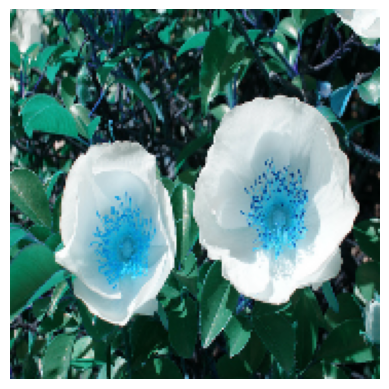

In [30]:
plt.axis('off')
plt.imshow(X[0])

In [31]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)

])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
86/86 [==============================] - 94s 1s/step - loss: 1.3502 - accuracy: 0.4142
Epoch 2/10
86/86 [==============================] - 90s 1s/step - loss: 1.0589 - accuracy: 0.5818
Epoch 3/10
86/86 [==============================] - 91s 1s/step - loss: 0.9479 - accuracy: 0.6352
Epoch 4/10
86/86 [==============================] - 91s 1s/step - loss: 0.8758 - accuracy: 0.6508
Epoch 5/10
86/86 [==============================] - 92s 1s/step - loss: 0.7959 - accuracy: 0.6904
Epoch 6/10
86/86 [==============================] - 93s 1s/step - loss: 0.7737 - accuracy: 0.6977
Epoch 7/10
86/86 [==============================] - 98s 1s/step - loss: 0.7403 - accuracy: 0.7177
Epoch 8/10
86/86 [==============================] - 93s 1s/step - loss: 0.6958 - accuracy: 0.7333
Epoch 9/10
86/86 [==============================] - 93s 1s/step - loss: 0.6891 - accuracy: 0.7387
Epoch 10/10
86/86 [==============================] - 97s 1s/step - loss: 0.6406 - accuracy: 0.7605


In [32]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 8s 283ms/step - loss: 0.8012 - accuracy: 0.6906


[0.8011758327484131, 0.6906318068504333]